![Alt text](https://www.modernfamilylaw.com/wp-content/uploads/2019/02/yelp-logo-transparent-background-4.png)

<font face = georgia>
<h1> <center>Data Bootcamp Group Project</center></h1>
<h2> <center>Yelp Business Data: Restaurants in the United States</center>
<h3> <center>Yue Cui, Ewan (Yuanhao) Zhao, Heropeia Hu</center>

<font size='4'>
<h3> Introduction


This project studies **restaurants in the United States** that are listed on **_Yelp.com_** with related datasets collected from the <a href = 'https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4'>Yelp Dataset</a> webpage on **Kaggle**. Given that the main focus of this project is business instead of users, the <a href = 'https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4#yelp_business.csv'>Yelp_business</a> and the <a href = 'https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4#yelp_business_attributes.csv'>Yelp_business_attributes</a> are the two most frequently used datasets in this case.

In this project, the first **research purpose** is to **analyze data relathionships** among restaurants categories, attributes and stars rating. After completion, we are able to tell the insights of which **cuisine categories** and **business attributes** contribute to **higher stars rating**. Secondly, based on the analysis, we create **search basis** for **western coast** restaurants **by names, cities, and parking facilities**. The customized recommendations could benefit both users and business owners to better locate friendly services and restaurants in local areas.

**The project strucutres as follows:**
- **I. Data Frame Presentation**
  * 1.1 _Business_ Dataset Cleaning
  * 1.2 _Attribute_ Dataset Cleaning
  * 1.3 _Business_ and _Attribute_ Data Frames Merging
  * 1.4 Data Visualization 
- **II. Data Relationships**
  * 2.1 Relationship Analysis of Star Ratings
    * Relationship between Review Counts and Ratings
    * Relationship between Cuisines and Ratings
    * Relationship between States and Ratings
  * 2.2 Multiple Linear Regression
      * Attributes and Ratings
      * Cuisines and Ratings
  * 2.3 Linear Regression Model Using Machine Learning
- **III. West Coast Restaurant Recommendation Tool**
  * Restaurants located on the **_West Coast_**: CA, NV, AZ, OR, WA
    * Restaurant recommendation by <font color='Orange'>NAME</font>
    * Restaurant recommendation by <font color='Orange'>CITY</font>
    * Restaurant recommendation by <font color='Orange'>PARKING Facilities</font>

<font size='4'>
<h3> Project

In [1]:
# importing necessery libraries for future analysis of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.api import add_constant
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# loading datasets
business = pd.read_csv('/Users/heropeia/Desktop/Final Project/Data/yelp_business.csv')
attribute = pd.read_csv('/Users/heropeia/Desktop/Final Project/Data/yelp_business_attributes.csv')
busi_attr = pd.read_csv('/Users/heropeia/Desktop/Final Project/Data/yelp_business_attributes.csv')

<font size='5'>
    <h3><center>I. Data Frame Presentation</center>

<font size = 3 face = 'georgia'>
    In this section, two original data frames will be <b>cleaned</b>, <b>reshaped</b> and <b>merged</b> to develop into a <b>new data frame</b> showing both <b>basic information</b> and <b>detailed attributes</b> of restaurants in the United States. This data <b>cleaning process</b> would make analysis tasks in the next two sections much <b>easier</b> to complete.

<font size='4'>
    <h3><center>1.1 <i>Business</i> Dataset Cleaning</center>

<font size='3'>
    <h3> A. Brief Overview of the Yelp_business Dataset

In [3]:
business

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174562,ALV5R8NkZ1KGOZeuZl3u0A,"""Whitby Toyota""",NaN,"""1025 Dundas Street W""",Whitby,ON,L1P 1Z1,43.873460,-78.968033,4.0,4,1,Car Dealers;Automotive
174563,gRGalHVu6BcaUDIAGVW_xQ,"""Village Auto Body""",NaN,"""3957 Brecksville Rd""",Richfield,OH,44286,41.243385,-81.636212,5.0,3,1,Body Shops;Automotive
174564,XXvZBIHoJBU5d6-a-oyMWQ,"""AAM""",NaN,"""1600 W Broadway Rd, Ste 200""",Tempe,AZ,85282,33.407914,-111.965098,1.5,19,1,Home Services;Property Management;Real Estate
174565,lNpPGgM96nPIYM1shxciHg,"""Bronze Beauty Spray Tanning""",NaN,"""300 Camp Horne Rd, Ste 250""",Pittsburgh,PA,15202,40.517724,-80.091466,5.0,14,1,Spray Tanning;Tanning;Beauty & Spas


<font size = '3'>
    <h4> Columns

In [4]:
# check type of every column in the dataset
business.dtypes

business_id      object
name             object
neighborhood     object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories       object
dtype: object

In [5]:
business.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')

<font size = '3'>
    <h4> Rows

In [6]:
# check the amount of rows in the given dataset to understand the size we are working with
print('There are '+str(len(business))+' rows in this dataset.')

There are 174567 rows in this dataset.


<font size='3'>
    <h3> B. Examine Missing Data

In [7]:
# find columns that have null values
# use'sum' function to show how many nulls are found in each column in dataset
obj = business.isnull().sum()
for key,value in obj.iteritems():
    print(key,":",value)

business_id : 0
name : 0
neighborhood : 106552
address : 0
city : 1
state : 1
postal_code : 623
latitude : 1
longitude : 1
stars : 0
review_count : 0
is_open : 0
categories : 0


<font size = '3'>
    <h4> Missing Data Heatmap

<font size = '3' color='olive' face = 'Georgia'>
    Figure 1. The <b>heat map</b> above demonstrates the proportion of <b>null values</b> in each column. More specifically, the lighter the strip is, the larger the amount of null values is within the column.</font>

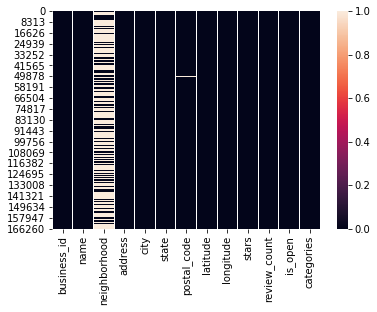

In [8]:
sns.heatmap(business.isnull())

In [9]:
# drop neighborhood column which has no actual meaning and has too many null values
business.drop(['neighborhood'], axis=1, inplace=True)
business.drop(['is_open'],axis=1,inplace=True)
# remove quotation marks in name and address column
business.name=business.name.str.replace('"','')
business.address=business.address.str.replace('"','')

<font size = '3'>
    <h4> Summary of the Business Dataset after Preprocessing

In [10]:
print('Rows     :',business.shape[0])
print('Columns  :',business.shape[1])
print('\nFeatures :\n     :',business.columns.tolist())
print('\nMissing values    :',business.isnull().values.sum())
print('\nUnique values :  \n',business.nunique())

Rows     : 174567
Columns  : 11

Features :
     : ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'categories']

Missing values    : 627

Unique values :  
 business_id     174567
name            132618
address         138564
city              1093
state               67
postal_code      16004
latitude        138432
longitude       138844
stars                9
review_count      1061
categories       76419
dtype: int64


<font size='3'>
    <h3> C. Filter and Categorize the U.S. Restaurants

<font size = '3'>
    <h4> Filter the U.S. Restaurants

In [11]:
US_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(US_states)]
us_restaurants=usa[usa['categories'].str.contains('Restaurants')]
us_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American (New);Nightlife;Bars;Sandwiches;Ameri...
10,XOSRcvtaKc_Q5H1SAzN20A,East Coast Coffee,737 West Pike St,Houston,PA,15342,40.241548,-80.212815,4.5,3,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
14,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,600 E 4th St,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,Restaurants;American (Traditional)
28,Dj0S-Oe4ytRJzMGUPgYUkw,Panera Bread,38295 Chestnut Ridge Rd,Elyria,OH,44035,41.343078,-82.067140,2.0,4,Soup;Salad;Sandwiches;Restaurants
29,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,2429 Hwy 160 W,Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,Food;American (Traditional);Coffee & Tea;Resta...
...,...,...,...,...,...,...,...,...,...,...,...
174520,Gr-2oBg4XyduSKbvnE-i9g,Salt & Lime Modern Mexican Grill,"9397 E Shea Blvd, Ste 115",Scottsdale,AZ,85260,33.581511,-111.879218,3.5,223,Salad;Food;Beer;Wine & Spirits;Restaurants;Mex...
174522,7wQXbUU2Mwvivg9wmBlrkg,Brown Bag Delis,1001 Liberty Ave,Pittsburgh,PA,15222,40.444209,-79.994669,3.0,7,Caterers;Event Planning & Services;Restaurants...
174523,nkDSE-yhvLX4ij5fSzvb5Q,Tonic Bar & Grill,971 Liberty Ave,Pittsburgh,PA,15222,40.443869,-79.995512,3.5,111,Nightlife;Bars;American (Traditional);Cocktail...
174532,Ls_nR1MEcsOw5KuTlh0dfQ,Cole's Public House,209 S Main St,Amherst,OH,44001,41.398166,-82.226472,4.5,21,Bars;Gastropubs;Nightlife;Restaurants;Pubs;San...


<font size = '3'>
    <h4> Categorize and Rename Cusine Types

In [12]:
us_restaurants.is_copy=False
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'
us_restaurants.category[:20]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


4     American
10         NaN
14    American
28         NaN
29    American
40    Japanese
44     Italian
45         NaN
46         NaN
52    American
53         NaN
54    American
64         NaN
72         NaN
75         NaN
76         NaN
80         NaN
81    American
88         NaN
91     Italian
Name: category, dtype: object

In [13]:
# drop null values in category, delete original column categories and reset the index
us_restaurants = us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']
us_restaurants = us_restaurants.reset_index(drop=True)

<font size='3'>
    <h3> D. Data Frame Presentation

In [14]:
us_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,category
0,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American
1,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,600 E 4th St,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,American
2,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,2429 Hwy 160 W,Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,American
3,tRVx2c89coruPRwYhGTcTw,Yuzu,13603 Madison Ave,Lakewood,OH,44107,41.476846,-81.786971,3.5,78,Japanese
4,BnuzcebyB1AfxH0kjNWqSg,Carrabba's Italian Grill,245 Lancaster Ave,Frazer,PA,19355,40.041003,-75.542497,3.5,25,Italian
...,...,...,...,...,...,...,...,...,...,...,...
19151,5zva2MTtB5IX6TaoVLL-NA,Zorbas Grill,440 W Warner Rd,Tempe,AZ,85284,33.335099,-111.944597,2.5,3,Greek
19152,vpwyL6NHm-pTWJ5IeJb9yw,Cocina Mendoza,300 Mt Lebanon Blvd,Pittsburgh,PA,15234,40.368716,-80.034629,3.5,71,Mexican
19153,Gr-2oBg4XyduSKbvnE-i9g,Salt & Lime Modern Mexican Grill,"9397 E Shea Blvd, Ste 115",Scottsdale,AZ,85260,33.581511,-111.879218,3.5,223,Mexican
19154,nkDSE-yhvLX4ij5fSzvb5Q,Tonic Bar & Grill,971 Liberty Ave,Pittsburgh,PA,15222,40.443869,-79.995512,3.5,111,American


<font size='4'>
    <h3><center>1.2 <i>Attribute</i> Dataset Cleaning</center>

<font size='3'>
    <h3> A. Brief Overview of the Yelp_business_attribute Dataset

In [15]:
# replace all Na as NaN
attribute = attribute.replace('Na', np.nan)
attribute

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,He-G7vWjzVUysIKrfNbPUQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8DShNS-LuFqpEWIp0HxijA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PfOCPjBrlQAnz__NXj9h_w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,o9eMRCWt5PkpLDE0gOPtcQ,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152036,kLFm_kehXNZkUc1oa2-Eaw,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152037,gRGalHVu6BcaU

<font size = '3'>
    <h4> Columns

In [16]:
attribute.dtypes

business_id                           object
AcceptsInsurance                     float64
ByAppointmentOnly                     object
BusinessAcceptsCreditCards            object
BusinessParking_garage                object
BusinessParking_street                object
BusinessParking_validated             object
BusinessParking_lot                   object
BusinessParking_valet                 object
HairSpecializesIn_coloring            object
HairSpecializesIn_africanamerican     object
HairSpecializesIn_curly               object
HairSpecializesIn_perms               object
HairSpecializesIn_kids                object
HairSpecializesIn_extensions          object
HairSpecializesIn_asian               object
HairSpecializesIn_straightperms       object
RestaurantsPriceRange2                object
GoodForKids                           object
WheelchairAccessible                  object
BikeParking                           object
Alcohol                               object
HasTV     

<font size = '3'>
    <h4> Rows

In [17]:
# check the amount of rows in the given dataset to understand the size we are working with
print('There are '+str(len(attribute))+' rows in this dataset.')

There are 152041 rows in this dataset.


<font size='3'>
    <h3> B. Examine Missing Data

In [18]:
# check null values for each column
obj = attribute.isnull().sum()
for key,value in obj.iteritems():
    print(key,":",value)

business_id : 0
AcceptsInsurance : 152041
ByAppointmentOnly : 151946
BusinessAcceptsCreditCards : 128460
BusinessParking_garage : 131649
BusinessParking_street : 112687
BusinessParking_validated : 112687
BusinessParking_lot : 113734
BusinessParking_valet : 112687
HairSpecializesIn_coloring : 112687
HairSpecializesIn_africanamerican : 152040
HairSpecializesIn_curly : 152040
HairSpecializesIn_perms : 152040
HairSpecializesIn_kids : 152040
HairSpecializesIn_extensions : 152040
HairSpecializesIn_asian : 152040
HairSpecializesIn_straightperms : 152040
RestaurantsPriceRange2 : 152040
GoodForKids : 146737
WheelchairAccessible : 131067
BikeParking : 112759
Alcohol : 141629
HasTV : 149207
NoiseLevel : 151824
RestaurantsAttire : 151955
Music_dj : 151958
Music_background_music : 152021
Music_no_music : 152021
Music_karaoke : 152021
Music_live : 152021
Music_video : 152021
Music_jukebox : 152021
Ambience_romantic : 152021
Ambience_intimate : 151979
Ambience_classy : 151979
Ambience_hipster : 15197

<font size = '3'>
    <h4> Missing Data Heatmap

<font size = '3' color='olive' face = 'Georgia'>
    Figure 2. The <b>heat map</b> above demonstrates the proportion of <b>null values</b> in each column. More specifically, the lighter the strip is, the larger the amount of null values is within the column.</font>

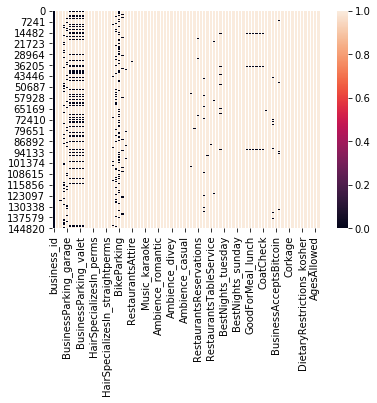

In [19]:
sns.heatmap(attribute.isnull())

**Remove columns that are not important for restaurant if the column:**  
1. is hard to understand
    
2. has too many null values

3. irrelevant

4. categorical repetition

In [20]:
full_list = ['business_id', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'GoodForDancing', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'Smoking', 'DriveThru', 'DogsAllowed',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService']
list_to_keep = ['business_id', 'BusinessAcceptsCreditCards','BusinessParking_lot', 
       'GoodForKids', 'WheelchairAccessible', 'Alcohol', 'RestaurantsAttire', 
       'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'RestaurantsDelivery', 'Smoking', 'Open24Hours']
list_to_remove = [i for i in full_list if i not in list_to_keep]
print(str(list_to_remove))

['AcceptsInsurance', 'ByAppointmentOnly', 'BusinessParking_garage', 'BusinessParking_street', 'BusinessParking_validated', 'BusinessParking_valet', 'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican', 'HairSpecializesIn_curly', 'HairSpecializesIn_perms', 'HairSpecializesIn_kids', 'HairSpecializesIn_extensions', 'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms', 'RestaurantsPriceRange2', 'BikeParking', 'HasTV', 'NoiseLevel', 'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke', 'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster', 'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy', 'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups', 'Caters', 'GoodForDancing', 'RestaurantsTableService', 'OutdoorSeating', 'BestNights_monday', 'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday', 'BestNights_satur

<font size='3'>
    <h3> C. Data Frame Presentation

In [21]:
attribute.drop(['AcceptsInsurance', 'ByAppointmentOnly', 'BusinessParking_garage', 'BusinessParking_street', 'BusinessParking_validated', 'BusinessParking_valet', 'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican', 'HairSpecializesIn_curly', 'HairSpecializesIn_perms', 'HairSpecializesIn_kids', 'HairSpecializesIn_extensions', 'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms', 'RestaurantsPriceRange2', 'BikeParking', 'HasTV', 'NoiseLevel', 'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke', 'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster', 'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy', 'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups', 'Caters', 'GoodForDancing', 'RestaurantsTableService', 'OutdoorSeating', 'BestNights_monday', 'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck', 'DriveThru', 'DogsAllowed', 'BusinessAcceptsBitcoin', 'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free', 'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan', 'DietaryRestrictions_kosher', 'DietaryRestrictions_halal', 'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian', 'AgesAllowed', 'RestaurantsCounterService'],axis = 1, inplace = True)
attribute

,business_id,BusinessAcceptsCreditCards,BusinessParking_lot,GoodForKids,WheelchairAccessible,Alcohol,RestaurantsAttire,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,RestaurantsDelivery,Smoking,Open24Hours
0,FYWN1wneV18bWNgQjJ2GNg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,He-G7vWjzVUysIKrfNbPUQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8DShNS-LuFqpEWIp0HxijA,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PfOCPjBrlQAnz__NXj9h_w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,o9eMRCWt5PkpLDE0gOPtcQ,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152036,kLFm_kehXNZkUc1oa2-Eaw,NaN,False,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152037,gRGalHVu6BcaUDIAGVW_xQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152038,XXvZBIHoJBU5d6-a-oyMWQ,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152039,lNpPGgM96nPIYM1shxciHg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size='4'>
    <h3><center>1.3 <i>Business</i> and <i>Attribute</i> Data Frames Merging</center>

<font size = 2.5>
    After merging the <b>Business</b> data frame with the <b>Attribute</b> data frame, several <b>attribute-related columns</b> have been <b>deleted</b> given that either that attribute is <b>categorized with varied levels</b> or there are far <b>too few "True" values</b> within the column. The <b>undesirable</b> columns are <b><i>'GoodForKids'</i></b>, <b><i>'Open24Hours'</i></b>, <b><i>'RestaurantsReservations'</i></b>, <b><i>'RestaurantsAttire'</i></b>, <b><i>'BusinessAcceptsCreditCards'</i></b>. 
    <br><br>
    Columns <b>retained</b> include <b><i>'BusinessParking_lot'</i></b>, <b><i>'WheelchairAccessible'</i></b>, <b><i>'Alcohol'</i></b>, <b><i>'RestaurantsTakeOut'</i></b>, <b><i>'HappyHour'</i></b>, <b><i>'RestaurantsDelivery'</i></b>, <b><i>'Smoking'</i></b>. These attributes will be used as <b>independent variables</b> later in regressions. 

<font size = 3 face = georgia>
   <b> Below is the combined data frame:</b> 

In [22]:
us_restaurants_attribute = pd.merge(us_restaurants,attribute,left_on='business_id',right_on='business_id',how='inner')
us_restaurants_attribute = us_restaurants_attribute.fillna(0)
us_restaurants_attribute.replace('True', 1, inplace=True)
us_restaurants_attribute.replace('False', 0, inplace=True)
us_restaurants_attribute = us_restaurants_attribute[['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                              'latitude', 'longitude', 'stars', 'review_count', 'category', 
                              'BusinessParking_lot' ,'WheelchairAccessible' ,'Alcohol',
                              'RestaurantsTakeOut' ,'HappyHour', 'RestaurantsDelivery', 'Smoking']]
us_restaurants_attribute

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,category,BusinessParking_lot,WheelchairAccessible,Alcohol,RestaurantsTakeOut,HappyHour,RestaurantsDelivery,Smoking
0,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American,0,0,0,0,0,0,0
1,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,600 E 4th St,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,American,0,1,0,0,0,0,0
2,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,2429 Hwy 160 W,Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,American,0,0,0,0,0,0,0
3,tRVx2c89coruPRwYhGTcTw,Yuzu,13603 Madison Ave,Lakewood,OH,44107,41.476846,-81.786971,3.5,78,Japanese,0,0,0,0,0,0,0
4,BnuzcebyB1AfxH0kjNWqSg,Carrabba's Italian Grill,245 Lancaster Ave,Frazer,PA,19355,40.041003,-75.542497,3.5,25,Italian,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18956,WUGbiFUhH6Iil_GCD0XU4g,Boston Market,829 Providence Rd,Charlotte,NC,28207,35.197532,-80.826105,3.5,17,American,0,1,0,0,0,0,0
18957,vpwyL6NHm-pTWJ5IeJb9yw,Cocina Mendoza,300 Mt Lebanon Blvd,Pittsburgh,PA,15234,40.368716,-80.034629,3.5,71,Mexican,0,0,0,0,0,0,0
18958,Gr-2oBg4XyduSKbvnE-i9g,Salt & Lime Modern Mexican Grill,"9397 E Shea Blvd, Ste 115",Scottsdale,AZ,85260,33.581511,-111.879218,3.5,223,Mexican,0,0,0,0,0,0,0
18959,nkDSE-yhvLX4ij5fSzvb5Q,Tonic Bar & Grill,971 Liberty Ave,Pittsburgh,PA,15222,40.443869,-79.995512,3.5,111,American,0,0,0,0,0,0,0


<font size='4'>
    <h3><center>1.4 Data Visualization</center>

<font size='3'>
    <h3> A. Geographic Distribution of the U.S. Restaurants

<font size = '3' color='olive' face = 'Georgia'>
    Figure 3. This <b>geographic distribution</b> is plotted by using the columns - <i>longtitude</i> and <i>latitude</i> - from the data frame.

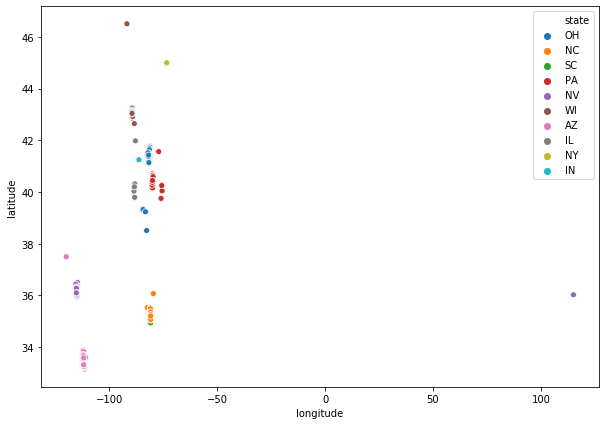

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(us_restaurants.longitude,us_restaurants.latitude,hue=us_restaurants.state)
plt.ioff()

<font size='3'>
    <h3> B. State-level and City-Level Restaurant Distributions

<font size = '3'>
    <h4> State-level

<font size = '3' color='olive' face = 'Georgia'>
    Figure 4. The <b>bar plot</b> presents the <b>number of restaurants in each state</b> in descending order. Within this <i>Yelp dataset</i>, the state with the <b>highet</b> amount of restaurants is <b>Arizona</b> of <b>6411</b> restaurants in total, whereas <b>Indiana</b> only have <b>one</b> restaurant.</font>

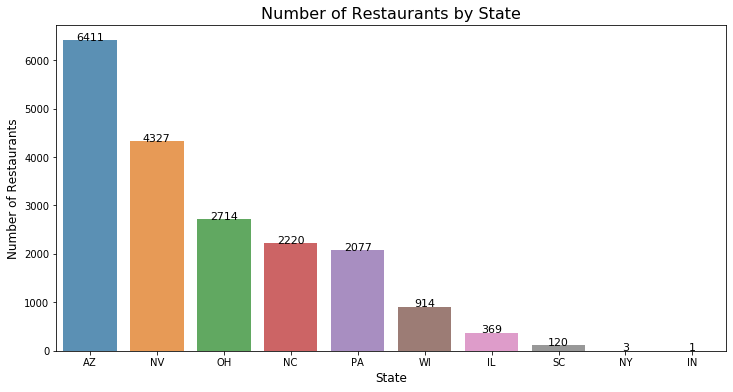

In [24]:
state_count = us_restaurants['state'].value_counts().sort_values(ascending = False)
plt.figure(figsize = (12,6))
sns.barplot(state_count.index, state_count.values, alpha = 0.8, order = state_count.index )
plt.title('Number of Restaurants by State', fontsize = 16)
plt.ylabel('Number of Restaurants', fontsize = 12)
plt.xlabel('State', fontsize = 12)
for i, v in enumerate(state_count):
    plt.text(i, v, str(v), horizontalalignment ='center', fontsize=11)
plt.show()

<font size = '3'>
    <h4> City-level

<font size = '3' color='olive' face = 'Georgia'>
    Figure 5. The <b>wordcloud</b> demonstrates the number of restaurants in each <b>city</b> through <b>font size</b>. <b>Las Vegas</b>, <b>Phoenix</b>, <b>Charlotte</b>, <b>Scottsdale</b>, <b>Cleveland</b> and <b>Pittsburgh</b> are cities with the <b>higest</b> number of restaurants. 

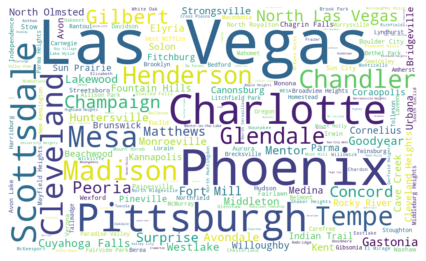

<Figure size 14400x7200 with 0 Axes>

In [25]:
city_count = us_restaurants['city'].value_counts()
wordcloud = WordCloud(width = 1000, height = 600,background_color='white', max_font_size = 150, 
                      min_font_size = 5, colormap = "viridis", 
                      collocations = False).generate_from_frequencies(city_count)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 1)
plt.figure(figsize = (200,100))
plt.show()

<font size='3'>
    <h3> C. Ratings and Cuisines

<font size = '3'>
    <h4> Rating

<font size = '3' color='olive' face = 'Georgia'>
    Figure 6. The <b>bar plot</b> presents the number of restaurants by <b>ratings (stars)</b>. In this dataset, there are only <b>375</b> restaurants winning <b>full scores</b> (5 stars) and <b>61</b> restaurants rated as <b>1-star</b>. Over <b>10,000</b> restaurants are rated between <b>3.0 and 4.0 stars</b>.

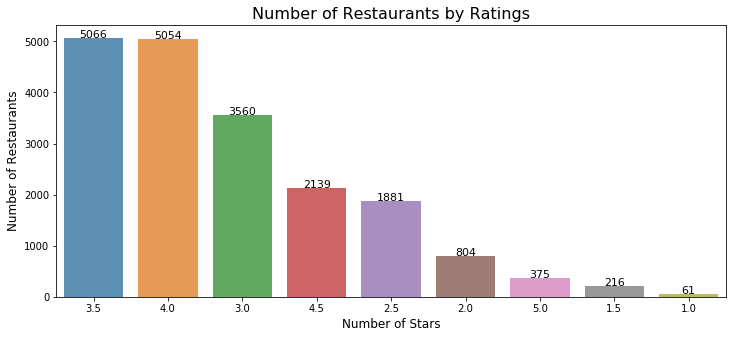

In [26]:
star_count = us_restaurants['stars'].value_counts().sort_values(ascending = False)
plt.figure(figsize = (12,5))
sns.barplot(star_count.index, star_count.values, alpha = 0.8, order = star_count.index)
plt.title('Number of Restaurants by Ratings', fontsize = 16)
plt.ylabel('Number of Restaurants', fontsize = 12)
plt.xlabel('Number of Stars', fontsize = 12)
for i, v in enumerate(star_count):
    plt.text(i, v, str(v), horizontalalignment ='center', fontsize = 11)
plt.show()

<font size = '3' color='olive' face = 'Georgia'>
    Figure 7. The <b>bar plot</b> presents the number of restaurants according to <b>ratings (stars)</b> in each state. Corresponding to the above plot, in most of the states, the <b>mode</b> is <b>3.5</b> or <b>4.0</b> stars.

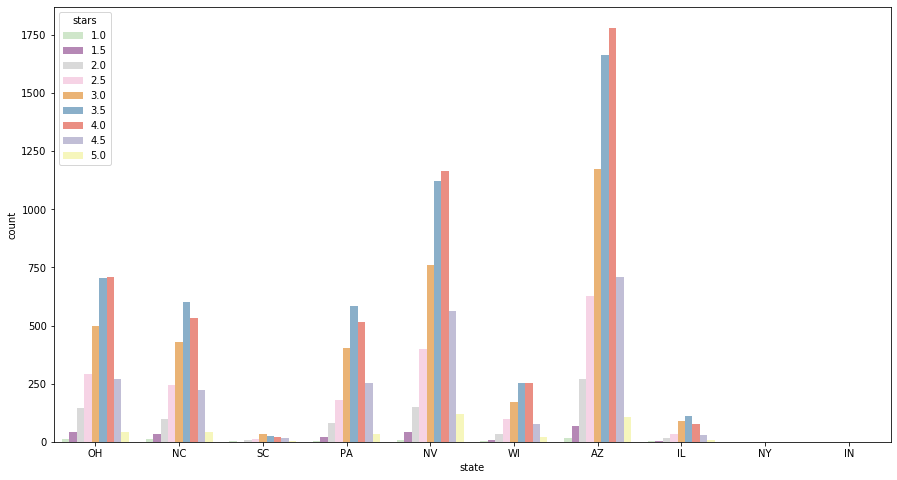

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x="state", hue = 'stars', palette='Set3_r', data=us_restaurants)

<font size = '3'>
    <h4> Cuisine

<font size = '3' color='olive' face = 'Georgia'>
    Figure 8. This <b>wordcloud</b> shows that the <b>three</b> main types of cuisine in the United States, based on the Yelp restaurant dataset, are <b>American</b>, <b>Mexican</b> and <b>Italian</b>. <b>Asian</b> and <b>Mediterranean</b> cusines are also highly welcomed according to the <b>number of each type of restaurants</b>.

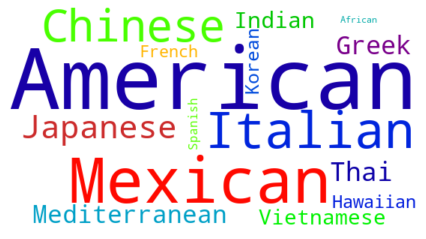

<Figure size 7200x4320 with 0 Axes>

In [28]:
category_count = us_restaurants['category'].value_counts()
wordcloud = WordCloud(width = 550, height = 300, background_color = 'white', 
                      max_font_size = 160, min_font_size = 10, colormap = "nipy_spectral",
                      collocations = False).generate_from_frequencies(category_count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 1)
plt.figure(figsize = (100,60))
plt.show()

<font size = '3' color='olive' face = 'Georgia'>
    Figure 9. More explicitly, this <b>bar plot</b> sorts the number of restaurant <b>by cusine</b> in descending order and  presents that there are <b>7314 American</b> restaurants and only <b>47 African</b> restaurants in the United States.

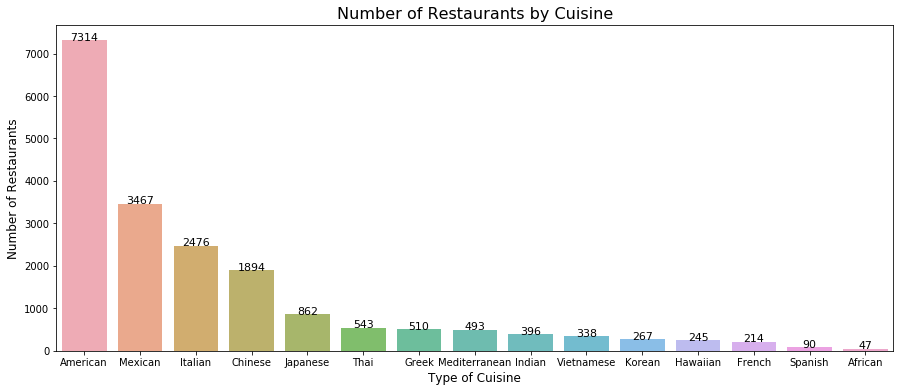

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(category_count.index, category_count.values, alpha=0.8, order = category_count.index)
plt.title('Number of Restaurants by Cuisine', fontsize = 16)
plt.ylabel('Number of Restaurants', fontsize = 12)
plt.xlabel('Type of Cuisine', fontsize = 12)
for i, v in enumerate(category_count):
    plt.text(i, v, str(v), horizontalalignment ='center', fontsize = 11)
plt.show()

<font size = '3' color='olive' face = 'Georgia'>
    Figure 10. The <b>bar plot</b> presents the number of restaurants according to the <b>type of cuisines</b> in <b>each state</b>. It is evident that the <b>American cuisine</b> indeed dominates in nearly every state. Moreover, there are also a large number of <b>Mexican</b> restaurants in <b>Neveda</b> and <b>Arizona</b>.  

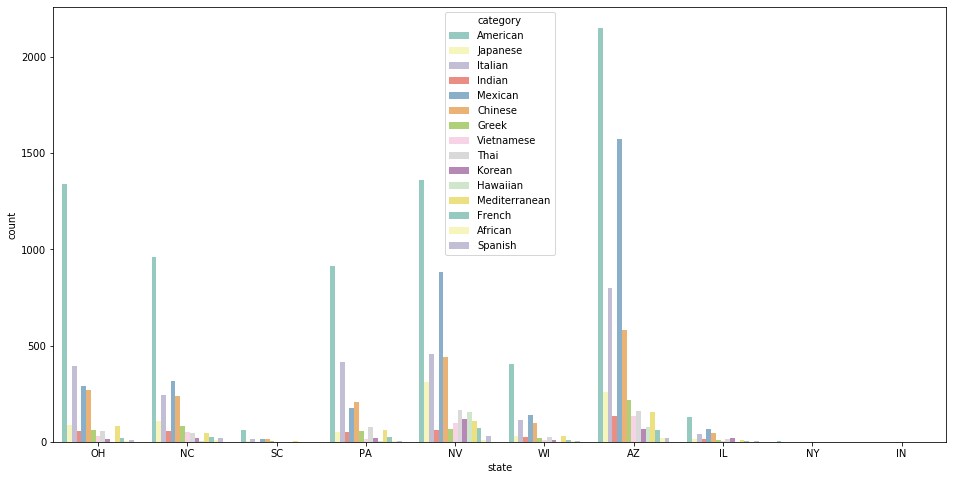

In [30]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.countplot(x="state", hue = 'category', palette="Set3", data=us_restaurants)

<font size='5'>
    <h3><center>II. Data Relationships</center>

<font size = 3 face = 'georgia'>
    Yelp connects people with great local businesses. For customers, rating a business with stars and reviews helps elevate next experience. For restaurant business owners, deciding on which business attribute to improve and cuisine type to provide is crucial in order to receive more positive feedbacks.
    <br><br>
    This section concentrates mainly on <b>relationships</b> between <b>restaurant rating</b> and its <b>relevant factors</b> that include <b>attributes</b> and <b>cuisine types</b>. <b>Multiple linear regressions</b> have been presented in the <b>second part</b> of this section for a more <b>direct</b> demonstration.

<font size='4'>
    <h3><center>2.1 Relationship Analysis of Star Ratings</center>

<font size='3'>
    <h3> A. Relationship between Review Counts and Ratings

In [31]:
print(smf.ols('stars ~ review_count',data=us_restaurants_attribute).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     591.8
Date:                Wed, 13 May 2020   Prob (F-statistic):          9.44e-129
Time:                        01:40:19   Log-Likelihood:                -20429.
No. Observations:               18961   AIC:                         4.086e+04
Df Residuals:                   18959   BIC:                         4.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4282      0.006    596.747   

<font size = '3' color='olive' face = 'Georgia'>
    Independent variable - <b>'review_count'</b> - is <b>positively correlated</b> with <b>ratings</b> and its corresponding <b>coefficient</b> is <b>0.0006</b>. It indicates that the <b>rating</b> of a restaurant will have <b>increased by 0.0006</b> if there is <b>one more review</b>. The <b>Adjusted R-square</b> of this model is <b>3.0%</b>.

<font size='3'>
    <h3> B. Relationship between Cuisines and Ratings

In [32]:
us_restaurants_attribute[['category','stars']].groupby('category').mean().sort_values(by = ['stars'], ascending = False)

,stars
category,
French,3.950000
Mediterranean,3.884774
Hawaiian,3.849794
Greek,3.819085
Thai,3.817343
Spanish,3.797753
African,3.776596
Vietnamese,3.760479
Korean,3.721374


<font size = '3' color='olive' face = 'Georgia'>
    The above <b>data frame</b> presents the <b>average rating by cuisine</b>. According to the Yelp dataset, <b>French</b> restaurants in the United States have the <b>highest</b> average rating of <b>3.95 stars</b>, whereas <b>Chinese</b> restaurants only have <b>3.30 stars</b> on average. 

<font size='3'>
    <h3> C. Relationship between States and Ratings

In [33]:
us_restaurants_attribute[['state','stars']].groupby('state').mean().sort_values(by = ['stars'], ascending = False)

,stars
state,
NY,3.666667
NV,3.553055
PA,3.508041
IN,3.500000
AZ,3.495213
WI,3.471207
NC,3.433303
OH,3.432498
IL,3.380822


<font size = '3' color='olive' face = 'Georgia'>
    The above <b>data frame</b> presents the <b>average rating by state</b>. According to the Yelp dataset, restaurants in <b>New York State</b> have the <b>highest</b> average rating of <b>3.67 stars</b>, whereas restaurants in <b>South Carolina</b> only have <b>3.37 stars</b> on average. 

<font size='4'>
    <h3><center>2.2 Multiple Linear Regression</center>

<font size='3'>
    <h3> A. Multiple Linear Regression: Attributes and Ratings

<font size = 3>
    <h3>Model 1. Relationship between Attributes and Restaurant Ratings (Full Model)

<font size = 2.5 color='olive' face = 'Georgia'>
    <b>Dependent Variable</b>: 'stars'
    <br><br>
    <b>Independent Variable</b>: 'review_count', 'BusinessParking_lot', 'WheelchairAccessible', 'Alcohol', 'RestaurantsTakeOut', 'HappyHour', 'RestaurantsDelivery', 'Smoking'

In [34]:
x = us_restaurants_attribute[['review_count','BusinessParking_lot' ,'WheelchairAccessible' ,'Alcohol',
                              'RestaurantsTakeOut' ,'HappyHour', 'RestaurantsDelivery', 'Smoking']]
y = us_restaurants_attribute['stars']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     78.39
Date:                Wed, 13 May 2020   Prob (F-statistic):          5.08e-128
Time:                        01:40:19   Log-Likelihood:                -20412.
No. Observations:               18961   AIC:                         4.084e+04
Df Residuals:                   18952   BIC:                         4.091e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.4120 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<font size= 3 color='olive' face = 'Georgia'>
    <b><u>Analysis</u></b>: </font>
    <br><br>
    <font color='olive' face = 'Georgia'>
    <b>Coefficients</b> of <b>'review_count'</b>, of <b>'BusinessParking_lot'</b> and of <b>'WheelchairAccessible'</b> are <b>significant</b> on <b>95%</b> level. 
    <br><br>
    Model has a <b>3.2%</b> Adjusted R-square, which gives a good base and would improve as much.

<font size = 3>
    <h3> Model 2. Relationship between Attributes and Restaurant Ratings (Only with Significant Regressors)

<font size = 2.5  color='olive' face = 'Georgia'>
    <b>Dependent Variable</b>: 'stars'
    <br><br>
    <b>Independent Variable</b>: 'review_count', 'BusinessParking_lot', 'WheelchairAccessible'

In [35]:
x = us_restaurants_attribute[['review_count','BusinessParking_lot' ,'WheelchairAccessible']]
y = us_restaurants_attribute['stars']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 13 May 2020   Prob (F-statistic):          1.46e-132
Time:                        01:40:19   Log-Likelihood:                -20414.
No. Observations:               18961   AIC:                         4.084e+04
Df Residuals:                   18957   BIC:                         4.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.4133 

<font size= 3 color='olive' face = 'Georgia'>
    <b><u>Analysis</u></b>:</font>
    <br><br>
    <font color='olive' face = 'Georgia'>
    <b>Independent variables</b> - <b>'review_count'</b>, <b>'BusinessParking_lot'</b> and <b>'WheelchairAccessible'</b> - are <b>positively</b> associated with <b>restaurant ratings</b> with coefficients <b>0.0006</b>, <b>0.2881</b> and <b>0.0527</b>, respectively. 
    <br><br>
    This model has a <b>3.2%</b> Adjusted R-square.

<font size='3'>
    <h3> B. Multiple Linear Regression: Cuisines and Ratings

<font size = '3'>
    <h4> Create Dummy Variables for restaurant categories

In [36]:
dummy = pd.get_dummies(us_restaurants_attribute['category'])
us_restaurants_attribute_reg = pd.concat([us_restaurants_attribute,dummy],axis=1)
us_restaurants_attribute_reg.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,category,BusinessParking_lot,WheelchairAccessible,Alcohol,RestaurantsTakeOut,HappyHour,RestaurantsDelivery,Smoking,African,American,Chinese,French,Greek,Hawaiian,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Spanish,Thai,Vietnamese
0,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,American,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,600 E 4th St,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,American,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,2429 Hwy 160 W,Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,American,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tRVx2c89coruPRwYhGTcTw,Yuzu,13603 Madison Ave,Lakewood,OH,44107,41.476846,-81.786971,3.5,78,Japanese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BnuzcebyB1AfxH0kjNWqSg,Carrabba's Italian Grill,245 Lancaster Ave,Frazer,PA,19355,40.041003,-75.542497,3.5,25,Italian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
us_restaurants_attribute_reg.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'category',
       'BusinessParking_lot', 'WheelchairAccessible', 'Alcohol',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsDelivery', 'Smoking',
       'African', 'American', 'Chinese', 'French', 'Greek', 'Hawaiian',
       'Indian', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican',
       'Spanish', 'Thai', 'Vietnamese'],
      dtype='object')

<font size = 3>
    <h3>Model 1. Relationship between Cuisines and Restaurant Ratings (Full Model)

<font size=2.5 color='olive' face = 'Georgia'>
        <b>Dependent Variable</b>: 'stars'
    <br><br>
    <b>Independent Variable</b>: 'review_count', 'BusinessParking_lot', 'WheelchairAccessible','Alcohol',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsDelivery', 'Smoking', 'African', 'American', 'Chinese', 'French', 'Greek', 'Hawaiian', 'Indian', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican', 'Spanish', 'Thai', 'Vietnamese'

In [38]:
x = us_restaurants_attribute_reg[['review_count', 
       'BusinessParking_lot', 'WheelchairAccessible', 'Alcohol',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsDelivery', 'Smoking',
       'African', 'American', 'Chinese', 'French', 'Greek', 'Hawaiian',
       'Indian', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican',
       'Spanish', 'Thai', 'Vietnamese']]
y = us_restaurants_attribute_reg['stars']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     68.67
Date:                Wed, 13 May 2020   Prob (F-statistic):          1.89e-294
Time:                        01:40:19   Log-Likelihood:                -19993.
No. Observations:               18961   AIC:                         4.003e+04
Df Residuals:                   18938   BIC:                         4.021e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.3767 

<font size= 3 color='olive' face = 'Georgia'>
    <b><u>Analysis</u></b>:</font>
    <br><br>
    <font color='olive' face = 'Georgia'>
    <b>Coefficients</b> of <b>'review_count'</b>, of <b>'BusinessParking_lot'</b>, of <b>'WheelchairAccessible'</b>, of <b>'African'</b>, of <b>'American'</b>, of <b>'Chinese'</b>, of <b>'French'</b>, of <b>'Greek'</b>, of <b>'Hawaiian'</b>, of <b>'Indian'</b>, of <b>'Japanese'</b>, of <b>'Korean'</b>, of <b>'Mediterranean'</b>, of <b>'Spanish'</b>, of <b>'Thai'</b>, and of <b>'Vietnamese'</b> are <b>significant</b> on <b>95%</b> level. 
    <br><br>
    This model has a <b>7.3%</b> Adjusted R-square.

<font size = 3>
    <h3> Model 2. Relationship between Cuisines and Restaurant Ratings (Only with Significant Regressors)

<font size=2.5 color='olive' face = 'Georgia'>
    <b>Dependent Variable</b>: 'stars'
    <br><br>
    <b>Independent Variable</b>: 'review_count', 'BusinessParking_lot', 'WheelchairAccessible', 'African', 'Chinese', 'French', 'Greek', 'Hawaiian', 'Indian', 'American', 'Japanese', 'Korean', 'Mediterranean', 'Spanish', 'Thai', 'Vietnamese'

In [39]:
x = us_restaurants_attribute_reg[['review_count', 
       'BusinessParking_lot', 'WheelchairAccessible',
       'African', 'Chinese', 'French', 'Greek', 'Hawaiian',
       'Indian', 'American', 'Japanese', 'Korean', 'Mediterranean', 
       'Spanish', 'Thai', 'Vietnamese']]
y = us_restaurants_attribute_reg['stars']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     93.83
Date:                Wed, 13 May 2020   Prob (F-statistic):          2.89e-298
Time:                        01:40:19   Log-Likelihood:                -19997.
No. Observations:               18961   AIC:                         4.003e+04
Df Residuals:                   18944   BIC:                         4.016e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.3805 

<font size= 3 color='olive' face = 'Georgia'>
    <b><u>Analysis</u></b>:</font>
    <br><br>
    <font color='olive' face = 'Georgia'>
    There are <b>positive correlations</b> between <b>most of the independent variables</b> and <b>restaurant ratings</b>. However, regressors - <b>Chinese</b> and <b>American</b> - are <b>negatively</b> related to <b>ratings</b> with coefficients <b>-0.1351</b> and <b>-0.0292</b>, respectively. Therefore, according to these <b>negative coefficients</b>, restaurants that offer either <b>Chinese</b> or <b>American</b> cuisine receive <b>lower ratings</b>, holding other factors constant.
    <br><br>
    This model has a <b>7.3%</b> Adjusted R-square.

<font size='4'>
   <h3><center>2.3 Linear Regression Model Using Machine Learning</center>

<font size= 3 color='olive' face = 'Georgia'>
    The <b>linear model</b> is fitted. The <b>coefficient of determination</b> (<b>R-square</b>) of the prediction is stated as the <b>accuracy score</b> down below: 

In [40]:
x = us_restaurants_attribute_reg[['review_count', 
       'BusinessParking_lot', 'WheelchairAccessible', 'Alcohol',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsDelivery', 'Smoking',
       'African', 'American', 'Chinese', 'French', 'Greek', 'Hawaiian',
       'Indian', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican',
       'Spanish', 'Thai', 'Vietnamese']]
y = us_restaurants_attribute_reg['stars']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
from sklearn.linear_model import LinearRegression
skl_lin_regr = LinearRegression().fit(x_train,y_train)
print('Accuracy Score', skl_lin_regr.score(x_test,y_test))

Accuracy Score 0.060915574784172984


<font size= 3 color='olive' face = 'Georgia'>
    Estimate the <b>intercept</b> and <b>coefficients</b> for the linear regression

In [41]:
coeff_df = pd.DataFrame(data = skl_lin_regr.coef_,index= [['review_count', 
       'BusinessParking_lot', 'WheelchairAccessible', 'Alcohol',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsDelivery', 'Smoking',
       'African', 'American', 'Chinese', 'French', 'Greek', 'Hawaiian',
       'Indian', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican',
       'Spanish', 'Thai', 'Vietnamese']], columns=['Coefficient'])
print('intercept',skl_lin_regr.intercept_)
print(coeff_df)

intercept 3.588553178637596
                      Coefficient
review_count             0.000647
BusinessParking_lot      0.227975
WheelchairAccessible     0.060645
Alcohol                  0.436569
RestaurantsTakeOut      -0.278883
HappyHour                0.075031
RestaurantsDelivery      0.174091
Smoking                  0.149317
African                  0.037444
American                -0.253741
Chinese                 -0.335352
French                   0.178142
Greek                    0.170937
Hawaiian                 0.142166
Indian                   0.013161
Italian                 -0.190130
Japanese                -0.063393
Korean                   0.028687
Mediterranean            0.240314
Mexican                 -0.236008
Spanish                  0.061829
Thai                     0.149302
Vietnamese               0.056641


<font size= 3 color='olive' face = 'Georgia'>
    Generate <b>predicted values</b> (<b>y_hat</b>) for restaurant ratings by using the <b>linear model</b>

In [42]:
lin_reg_predict_stars = pd.DataFrame(data=skl_lin_regr.predict(x_test))
lin_reg_predict_stars.rename(columns={0:'Stars_Rating_Predictions'}, inplace=True)
lin_reg_predict_stars.set_index('Stars_Rating_Predictions')

""
Stars_Rating_Predictions
6.858890
3.429535
3.850802
3.342576
3.349046
...
3.255789
3.565400
3.412450


<font size='5'>
    <h3><center> III. West Coast Restaurants Recommendation Tool</center>

<font size = 3 face = 'georgia'>
    This section discovers <b>restaurants on the West Coast</b>. Three West Coast restaurant <b>recommendation tools</b> have been created and can be applied for restaurant search through entering <b>1) restaurant numbers</b>, <b>2) city indices</b> and <b>3) needs for parking facilities</b> with detailed instructions.

<font size='3'>
    <h3> A. Filter Restaurants Located on the West Coast (CA, NV, AZ, OR, WA)

<font size = '3'>
    <h4> Filter Restaurants on the West Coast

In [43]:
west_states = ["CA","NV","AZ","OR","WA"]
western = business.loc[business['state'].isin(west_states)]
restaurants = western[western['categories'].str.contains('Restaurants')]
western = us_restaurants.loc[us_restaurants['state'].isin(west_states)]
restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
45,rDMptJYWtnMhpQu_rRXHng,McDonald's,719 E Thunderbird Rd,Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,Fast Food;Burgers;Restaurants
46,1WBkAuQg81kokZIPMpn9Zg,Charr An American Burger Bar,"777 E Thunderbird Rd, Ste 107",Phoenix,AZ,85022,33.607310,-112.063404,3.0,232,Burgers;Restaurants
52,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,6730 S Las Vegas Blvd,Las Vegas,NV,89119,36.066914,-115.170848,4.0,13,Nightlife;Bars;Barbeque;Sports Bars;American (...
53,4srfPk1s8nlm1YusyDUbjg,Subway,"6889 S Eastern Ave, Ste 101",Las Vegas,NV,89119,36.064652,-115.118954,2.5,6,Fast Food;Restaurants;Sandwiches
54,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"6587 Las Vegas Blvd S, Ste 171",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,Arcades;Arts & Entertainment;Gastropubs;Restau...
...,...,...,...,...,...,...,...,...,...,...,...
174469,6HdzmAatFoB8UDep4n9QIw,IHOP,5170 S Fort Apache Rd,Las Vegas,NV,89148,36.095080,-115.296775,3.0,82,Breakfast & Brunch;American (New);American (Tr...
174479,vGDhK2Lc4Np5iZYZ7FG0QA,Escobar Mexican Kitchen,"1219 E Glendale Ave, Ste 14",Phoenix,AZ,85020,33.537893,-112.055100,4.5,132,Food;Mexican;Restaurants;Specialty Food
174504,5zva2MTtB5IX6TaoVLL-NA,Zorbas Grill,440 W Warner Rd,Tempe,AZ,85284,33.335099,-111.944597,2.5,3,Mediterranean;Greek;Restaurants
174520,Gr-2oBg4XyduSKbvnE-i9g,Salt & Lime Modern Mexican Grill,"9397 E Shea Blvd, Ste 115",Scottsdale,AZ,85260,33.581511,-111.879218,3.5,223,Salad;Food;Beer;Wine & Spirits;Restaurants;Mex...


<font size = '3' color='olive' face = 'Georgia'>
    Figure 11. The <b>bar plot</b> demonstrates <b>Top 10 cities on the West Coast</b> with the <b>highest number of restaurants</b>. The city with the <b>most</b> restaurants is <b>Las Vegas</b> and there are <b>5,899</b> restaurants located within that city. Other cities include <b>Phoenix</b>, <b>Scottsdale</b>, <b>Mesa</b>, <b>Tempe</b>, <b>Chandler</b>, <b>Henderson</b>, <b>Glendale</b>, <b>Gilbert</b>, <b>Peoria</b>.

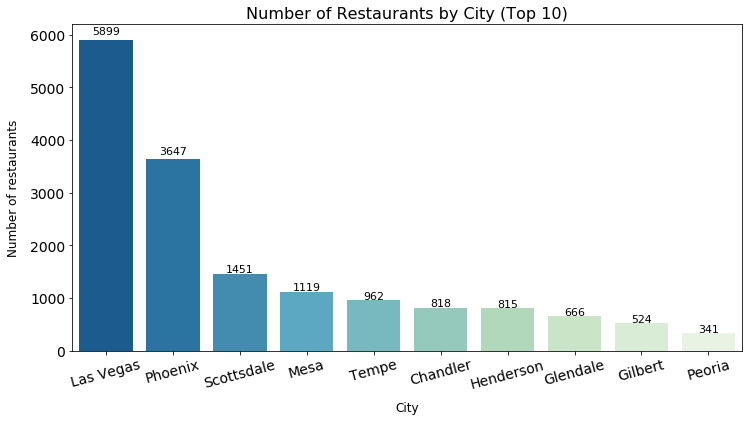

In [44]:
city_rank = restaurants.city.value_counts()[:10]
plt.figure(figsize = (12,6))
sns.barplot(city_rank.index, city_rank.values, palette = sns.color_palette("GnBu_r", len(city_rank)))
plt.title('Number of Restaurants by City (Top 10)', fontsize = 16)
plt.ylabel('Number of restaurants', fontsize = 12, labelpad = 10)
plt.xlabel('City', fontsize = 12, labelpad = 10)
plt.tick_params(labelsize = 14)
plt.xticks(rotation = 15)
for  i, v in enumerate(city_rank):
    plt.text(i, v*1.02, str(v), horizontalalignment = 'center', fontsize = 11)

<font size = '3'>
    <h4> Merge Business with Attributes for Restaurants on the West Coast

In [45]:
info = restaurants.merge(busi_attr,left_on='business_id',right_on='business_id',how='inner')
info

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,rDMptJYWtnMhpQu_rRXHng,McDonald's,719 E Thunderbird Rd,Phoenix,AZ,85022,33.607070,-112.064382,1.0,10,Fast Food;Burgers;Restaurants,Na,Na,Na,Na,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,1WBkAuQg81kokZIPMpn9Zg,Charr An American Burger Bar,"777 E Thunderbird Rd, Ste 107",Phoenix,AZ,85022,33.607310,-112.063404,3.0,232,Burgers;Restaurants,Na,Na,Na,Na,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,6730 S Las Vegas Blvd,Las Vegas,NV,89119,36.066914,-115.170848,4.0,13,Nightlife;Bars;Barbeque;Sports Bars;American (...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,4srfPk1s8nlm1YusyDUbjg,Subway,"6889 S Eastern Ave, Ste 101",Las Vegas,NV,89119,36.064652,-115.118954,2.5,6,Fast Food;Restaurants;Sandwiches,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"6587 Las Vegas Blvd S, Ste 171",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,Arcades;Arts & Entertainment;Gastropubs;Restau...,Na,Na,Na,Na,True,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

<font size='3'>
    <h3> B. Restaurant Recommendation by <i>NAME</i>

In [46]:
def search_by_rest(df_name, sector_num):
    df_name = df_name.sort_values('name')
    df_name = df_name.dropna()
    dt = dict(enumerate(df_name['name'].unique()))
    if sector_num == 'library':
        print(dt)
        sector_num_2 = input("choose restaurant number (type 'library' to view options): ")
        return search_by_rest(df_name, sector_num_2)
    elif re.findall('[^0-9]',sector_num) != []:
        print('Invalid Input \n')
        sector_num_2 = input("choose restaurant number (type 'library' to view options): ")
        return search_by_sector(df_name, sector_num_2)
    elif int(sector_num) not in dt.keys():
        print('Invalid Input \n')
        sector_num_2 = input("choose restaurant number (type 'library' to view options): ")
        return search_by_sector(df_name, sector_num_2)
    else:
        result = df_name.groupby(['name']).get_group(dt[int(sector_num)])
        return result

<font size= 3 color='olive' face = 'Georgia'>
    <b><u>Instruction:</u></b> </font>
    <br><br>
    <font color='olive' face = 'Georgia'>
    This <b>recommendation tool</b> could be applied for searching <b>SPECIFIC restaurants on the West Coast</b> with a <b>list of restaurant numbers</b> in which <b>each number</b> corresponds to a <b>unique restaurant</b> in the above <b><i>'info'</i></b> data frame. Please type <b>'library'</b> in the space for the <b>entire restaurant list</b>. Or, enter a <b>number</b> directly for <b>restaurant search</b>.    

In [47]:
search_by_rest(info,sector_num = input("choose sector number (type 'library' to view options): "))

choose sector number (type 'library' to view options): 43


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
6470,7SBtCKKeHbdB6-dIIkcZXw,2nd Annual Asian Food Festival,3333 Blue Diamond Rd,Las Vegas,NV,89139,36.041673,-115.184999,3.0,7,Restaurants;Indian;Arts & Entertainment;Asian ...,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


<font size='3'>
    <h3> C. Restaurant Recommendation by <i>CITY</i>

In [48]:
def search_by_city(df_city, city_num):
    df_city = df_city.sort_values('city')
    df_city = df_city.dropna()
    dt = dict(enumerate(df_city['city'].unique()))
    if city_num == 'library':
        print(dt)
        city_num_2 = input("choose city number (type 'library' to view options): ")
        return search_by_city(df_city, city_num_2)
    elif re.findall('[^0-9]', city_num) != []:
        print('Invalid Input \n')
        city_num_2 = input("choose city number (type 'library' to view options): ")
        return search_by_city(df_city, city_num_2)
    elif int(city_num) not in dt.keys():
        print('Invalid Input \n')
        city_num_2 = input("choose city number (type 'library' to view options): ")
        return search_by_city(df_city, city_num_2)
    else:
        result = df_city.groupby(['city']).get_group(dt[int(city_num)])
        return result

<font size= 3 color='olive' face = 'Georgia'>
    <b><u>Instruction:</u></b> </font>
    <br><br>
    <font color='olive' face = 'Georgia'>
    This <b>recommendation tool</b> could be applied for searching <b>West Coast restaurants by city index</b> with a <b>list of city indices</b> in which <b>each number</b> corresponds to a <b>city</b> on the West Coast. Please type <b>'library'</b> in the space for the <b>entire city list</b>. Or, enter a <b>number</b> directly for <b>city-level restaurant search</b>.    

In [49]:
search_by_city(info, city_num = input("choose city index(type 'library' to view options): "))

choose city index(type 'library' to view options): 24


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
16046,ro4h-3oXNxk4KLa6__jV5Q,Montesano's Italian Deli,3441 W Sahara Ave Ste B2,Las Vegas,NV,89102,36.143294,-115.187386,5.0,4,Restaurants;Delis;Italian,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
8898,7gIK3en6jVyiColBvlHNPA,Noble Roman's Take-n-Bake Pizza,4190 S Rainbow Blvd,Las Vegas,NV,89103,36.112519,-115.242605,3.0,4,Restaurants;Pizza,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
16022,IF9C_h3NONhXZ7bbyhtnxA,Osi's Kitchen,"4604 W Sahara Ave, Ste 6",Las Vegas,NV,89102,36.144962,-115.204818,4.5,127,Caterers;Mediterranean;Food;Kosher;Restaurants...,Na,Na,Na,Na,False,True,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,False,False,True,True,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
8895,94GNGMxmruuqRLRhLqllWw,Wendy's,8900 W Charleston Blvd,Las Vegas,NV,89117,36.159533,-115.289648,3.0,47,Fast Food;Burgers;Restaurants,Na,Na,Na,Na,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
8816,nt2-Zk4FmGY2SYSDBI0gHw,Durango Taco Shop,7785 N Durango Dr,Las Vegas,NV,89131,36.302479,-115.282353,3.0,58,Tacos;Restaurants;Mexican,Na,Na,Na,Na,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

<font size='3'>
    <h3> D. Restaurant Recommendations by <i>PARKING Facilities</i>

In [50]:
def search_by_parking(df_attribute, 
                      garage=None, street=None, validated=None, 
                     lot=None, valet=None):

    result = df_attribute
    temp =  ['False','Na','True']
    
    if garage == 'y':
        result = result.loc[result['BusinessParking_garage']=='True']
    else:
        result = result.loc[result['BusinessParking_garage'].isin(temp),:]
        
    if street == 'y':
        result = result.loc[result['BusinessParking_street'] == 'True']
    else:
        result = result.loc[result['BusinessParking_street'].isin(temp),:]
        
    if validated == 'y':
        result = result.loc[result['BusinessParking_validated']== 'True']
    else:
        result = result.loc[result['BusinessParking_validated'].isin(temp),:]
        
    if lot == 'y':
        result = result.loc[result['BusinessParking_lot']== 'True']
    else:
        result = result.loc[result['BusinessParking_lot'].isin(temp),:]
        
    if valet == 'y':
        result = result.loc[result['BusinessParking_valet']== 'True']
    else:
        result = result.loc[result['BusinessParking_valet'].isin(temp),:]
      
    return result

<font size= 3 color='olive' face = 'Georgia'>
    <b><u>Instruction:</u></b> </font>
    <br><br>
    <font color='olive' face = 'Georgia'>
    This <b>recommendation tool</b> could be applied for searching <b>West Coast restaurants by PARKING facilities</b>. Please type <b>'y/n'</b> in the space below for a <b>desirable restaurant search</b> according to your need for <b>parking**</b>. 
    <br><br>
    <b>**Notes</b>: Most of the restaurants in this case <b>only</b> satisfy one of the conditions below. There are two restaurants in Las Vegas having both a garage and valet service. 

In [51]:
search_by_parking(info,
                 garage=(input('Need a garage[y/n]:')), 
                 street=(input('Need a street parking[y/n]:')), 
                 validated=(input('Validated parking[y/n]:')), 
                 lot=(input('Need a lot[y/n]:')), 
                 valet=(input('Need a valet[y/n]:'))) 

Need a garage[y/n]:y
Need a street parking[y/n]:n
Validated parking[y/n]:n
Need a lot[y/n]:n
Need a valet[y/n]:y


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
2104,KjOpQ4QCf-sk_dbFJX_52w,Fido's Kitchen,"7875 W Sahara Ave, Ste 103",Las Vegas,NV,89117,36.143204,-115.262866,5.0,13,Pet Services;Pets;Food;Restaurants;Pet Adoptio...,Na,Na,Na,True,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2433,tpZfJdRi64OTBN4g7lRM3Q,Seoul Market,"1801 E Tropicana Ave, Ste 12",Las Vegas,NV,89119,36.100196,-115.126969,3.5,3,Food;Grocery;Korean;Restaurants,Na,Na,Na,True,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


<font size='4' face= georgia>
    <h3><center> - END -</center>